In [246]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
from collections import Counter, OrderedDict
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
import numpy as np
import seaborn as sns

In [247]:
#read in data
df = pd.read_csv('binary_predictions_2022.csv')
df.drop(columns=df.columns[0], inplace=True)
print(len(df))
df.head()

107663


,date,city,tweet,predicted_emotion
0,2022-10-22,Хмельницький,RT @dw_ukrainian: Хмельницький залишився без с...,others
1,2022-10-22,Хмельницький,RT @dw_ukrainian: Хмельницький залишився без с...,others
2,2022-10-22,Хмельницький,RT @superumka: Луцьк і Хмельницький просять на...,joy
3,2022-10-22,Хмельницький,Хмельницький після вранішніх вибухів опинився ...,sadness
4,2022-10-22,Хмельницький,RT @tsnua: Хмельницький після вранішніх вибухі...,sadness


In [248]:
df.tweet.str.len().max()

156

In [249]:
print(Counter(df.date))

Counter({'2022-04-10': 1843, '2022-04-03': 1807, '2022-04-11': 1739, '2022-04-21': 1674, '2022-05-03': 1540, '2022-04-09': 1411, '2022-04-07': 1383, '2022-04-18': 1377, '2022-11-11': 1163, '2022-04-02': 1093, '2022-11-12': 1074, '2022-05-02': 1060, '2022-11-13': 977, '2022-03-19': 907, '2022-11-14': 900, '2022-11-23': 895, '2022-03-20': 814, '2022-11-09': 812, '2022-04-06': 771, '2022-03-27': 752, '2022-04-13': 736, '2022-03-26': 735, '2022-04-20': 702, '2022-03-29': 687, '2022-10-09': 684, '2022-03-30': 679, '2022-11-24': 677, '2022-04-01': 658, '2022-03-21': 655, '2022-11-04': 616, '2022-04-19': 612, '2022-05-12': 610, '2022-03-23': 609, '2022-11-26': 595, '2022-05-01': 588, '2022-11-21': 578, '2022-05-08': 567, '2022-04-17': 564, '2022-04-23': 555, '2022-04-29': 554, '2022-11-03': 548, '2022-04-28': 547, '2022-09-16': 544, '2022-11-06': 541, '2022-11-05': 539, '2022-04-12': 531, '2022-08-24': 529, '2022-07-15': 522, '2022-07-31': 520, '2022-08-29': 516, '2022-11-20': 511, '2022-05-2

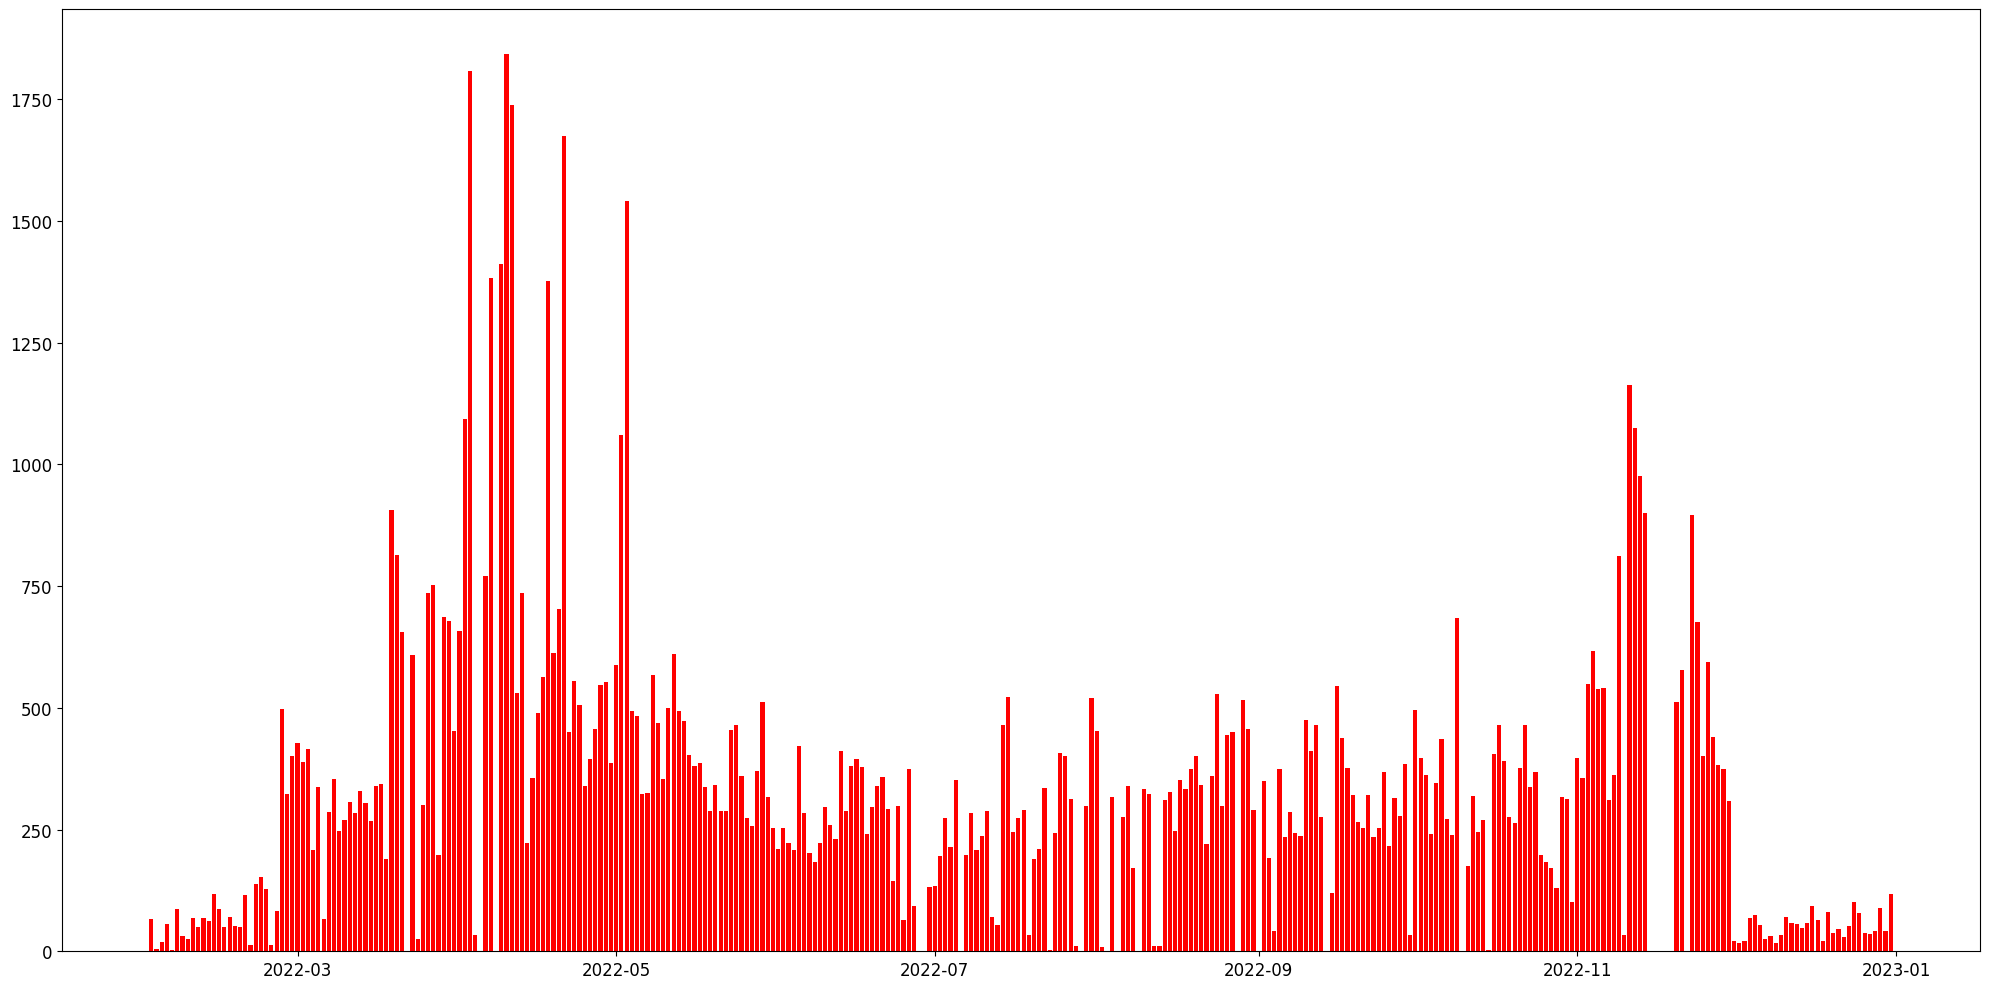

In [250]:
#histogram of tweet counts per day
fig, ax = plt.subplots(figsize=(20, 10))
date_count = Counter(df.date)
date_counter = date_count
date_count = sorted(date_count)
date_values = [date_counter[i] for i in date_count]
date_count_dt = pd.to_datetime(date_count)
plt.bar(date_count_dt, date_values, color='red')
xtick_locator = mdates.AutoDateLocator()
xtick_formatter = mdates.AutoDateFormatter(xtick_locator)
ax.xaxis.set_major_locator(xtick_locator)
ax.xaxis.set_major_formatter(xtick_formatter)
ax.tick_params(axis='x', labelsize=12)
plt.yticks(fontsize=12)
plt.savefig('date_hist.png')
plt.show()

In [251]:
#create emotion percentage dict for each day
date_dict = {}
for date in date_count:
    date_emotions = df[df.date == date]
    emotion_cts = Counter(date_emotions.predicted_emotion)
    count_emotions = {emotion : round(c/len(date_emotions), 3) for (emotion, c) in emotion_cts.items()}
    date_dict[date] = count_emotions
    
date_dict

{'2022-02-01': {'others': 0.485, 'joy': 0.439, 'anger': 0.076},
 '2022-02-02': {'others': 1.0},
 '2022-02-03': {'others': 0.526, 'joy': 0.474},
 '2022-02-04': {'sadness': 0.053,
  'others': 0.509,
  'anger': 0.14,
  'joy': 0.281,
  'fear': 0.018},
 '2022-02-05': {'others': 1.0},
 '2022-02-06': {'others': 0.391,
  'joy': 0.379,
  'fear': 0.115,
  'anger': 0.103,
  'sadness': 0.011},
 '2022-02-07': {'others': 0.406,
  'joy': 0.281,
  'sadness': 0.281,
  'fear': 0.031},
 '2022-02-08': {'others': 0.32, 'anger': 0.32, 'sadness': 0.08, 'joy': 0.28},
 '2022-02-09': {'joy': 0.221,
  'anger': 0.279,
  'others': 0.456,
  'fear': 0.029,
  'sadness': 0.015},
 '2022-02-10': {'joy': 0.388,
  'anger': 0.367,
  'others': 0.163,
  'fear': 0.061,
  'sadness': 0.02},
 '2022-02-11': {'others': 0.42, 'anger': 0.145, 'joy': 0.42, 'sadness': 0.014},
 '2022-02-12': {'joy': 0.349,
  'others': 0.54,
  'anger': 0.079,
  'sadness': 0.032},
 '2022-02-13': {'sadness': 0.06,
  'others': 0.581,
  'joy': 0.171,
  'ang

In [252]:
df['city'].value_counts()

city
Маріуполь       18874
Херсон          17592
Київ            17542
Харків           9615
Запоріжжя        7549
Миколаїв         5525
Дніпро           5358
Львів            5146
Донецьк          3547
Одеса            2884
Чернігів         2452
Севастополь      2074
Луганськ         1203
Суми             1067
Кривий Ріг       1056
Житомир           966
Вінниця           891
Полтава           860
Рівне             694
Чернівці          520
Хмельницький      514
Макіївка          482
Сімферополь       469
Черкаси           468
Горлівка          314
київ                1
Name: count, dtype: int64

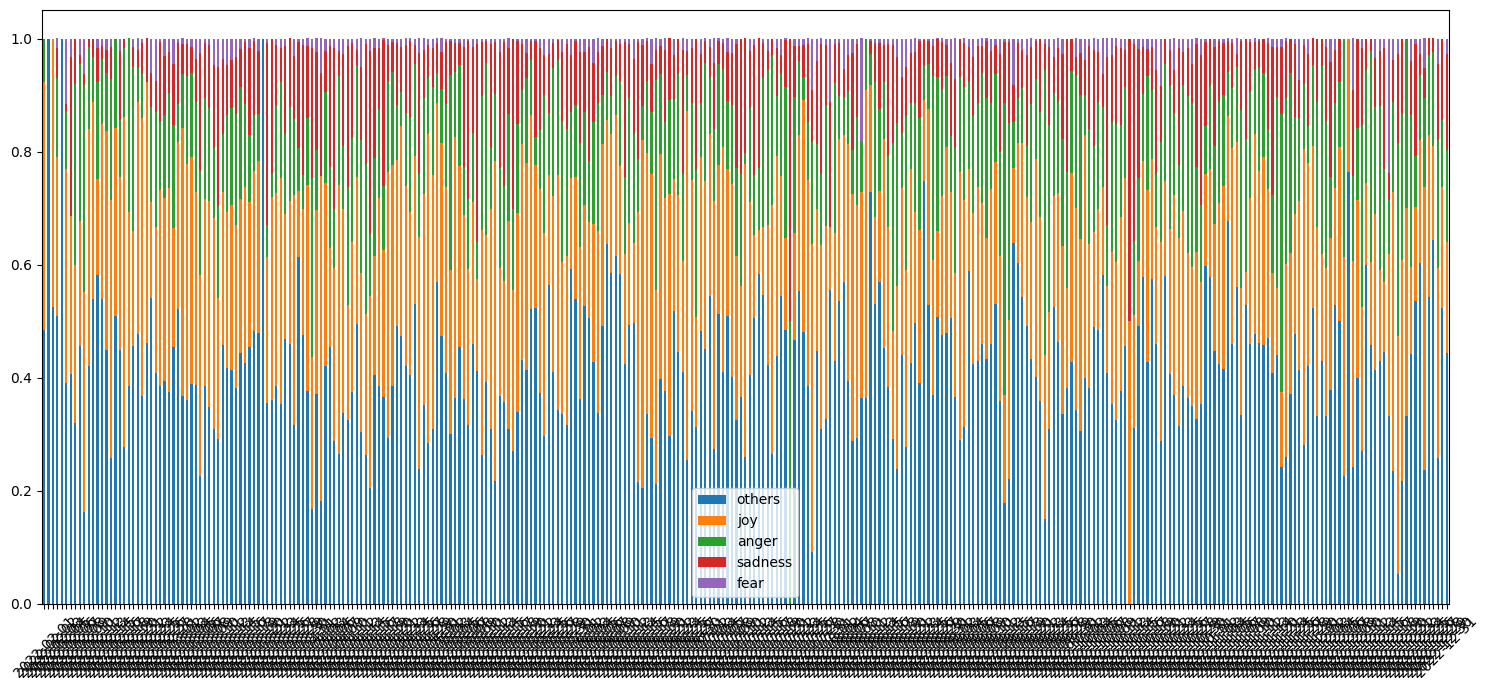

In [253]:
#emotion percentage graph 1
df_emotions = pd.DataFrame(date_dict)
df_emotions = df_emotions.transpose()
df_emotions = df_emotions.sort_index()
df_emotions = df_emotions.fillna(0)
df_emotions.plot(kind="bar", stacked=True)
plt.xticks(rotation=45)
plt.savefig('emotion_barchart.png')
plt.show()

In [254]:
df_emotions_prop

,others,joy,anger,sadness,fear
2022-02-01,0.485,0.439,0.076,0.000,0.000
2022-02-02,1.000,0.000,0.000,0.000,0.000
2022-02-03,0.526,0.474,0.000,0.000,0.000
2022-02-04,0.509,0.281,0.140,0.053,0.018
2022-02-05,1.000,0.000,0.000,0.000,0.000
...,...,...,...,...,...
2022-12-27,0.543,0.286,0.143,0.029,0.000
2022-12-28,0.643,0.167,0.167,0.024,0.000
2022-12-29,0.258,0.337,0.225,0.135,0.045
2022-12-30,0.524,0.214,0.119,0.143,0.000


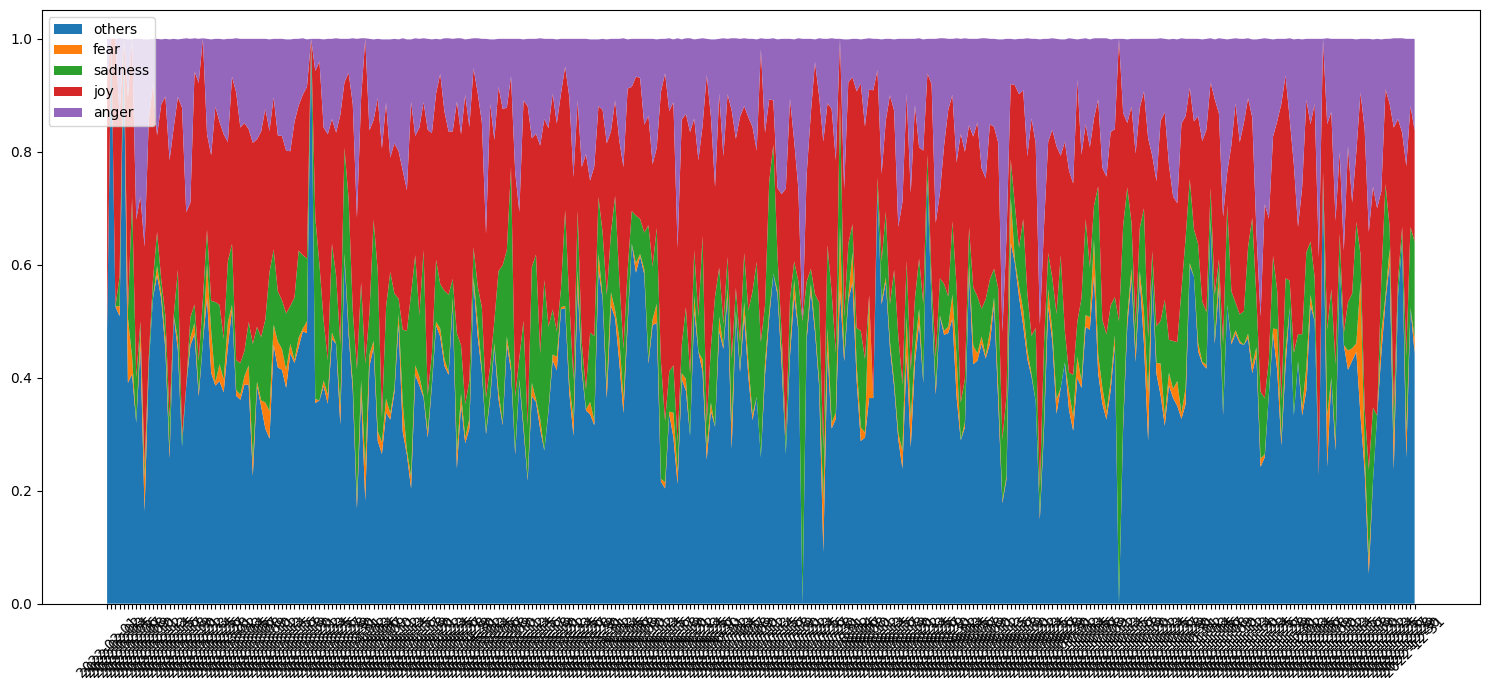

In [255]:
#emotion percentage graph 2
plt.stackplot(df_emotions_prop.index,  df_emotions_prop['others'], df_emotions_prop['fear'], df_emotions_prop['sadness'], df_emotions_prop['joy'], df_emotions_prop['anger'],
             labels=['others', 'fear', 'sadness', 'joy', 'anger'])
plt.legend(loc='upper left')
plt.xticks(rotation=45)
plt.savefig('emotion_stacked.png')

In [256]:
#dictionary with emotion counts per day
date_dict = {}
for date in date_count:
    date_emotions = df[df.date == date]
    emotion_cts = Counter(date_emotions.predicted_emotion)
    count_emotions = {emotion : c for (emotion, c) in emotion_cts.items()}
    date_dict[date] = count_emotions
df_emotions = pd.DataFrame(date_dict)
df_emotions = df_emotions.transpose()
df_emotions = df_emotions.sort_index()
df_emotions = df_emotions.fillna(0)
df_emotions.head()

,others,joy,anger,sadness,fear
2022-02-01,32.0,29.0,5.0,0.0,0.0
2022-02-02,4.0,0.0,0.0,0.0,0.0
2022-02-03,10.0,9.0,0.0,0.0,0.0
2022-02-04,29.0,16.0,8.0,3.0,1.0
2022-02-05,2.0,0.0,0.0,0.0,0.0


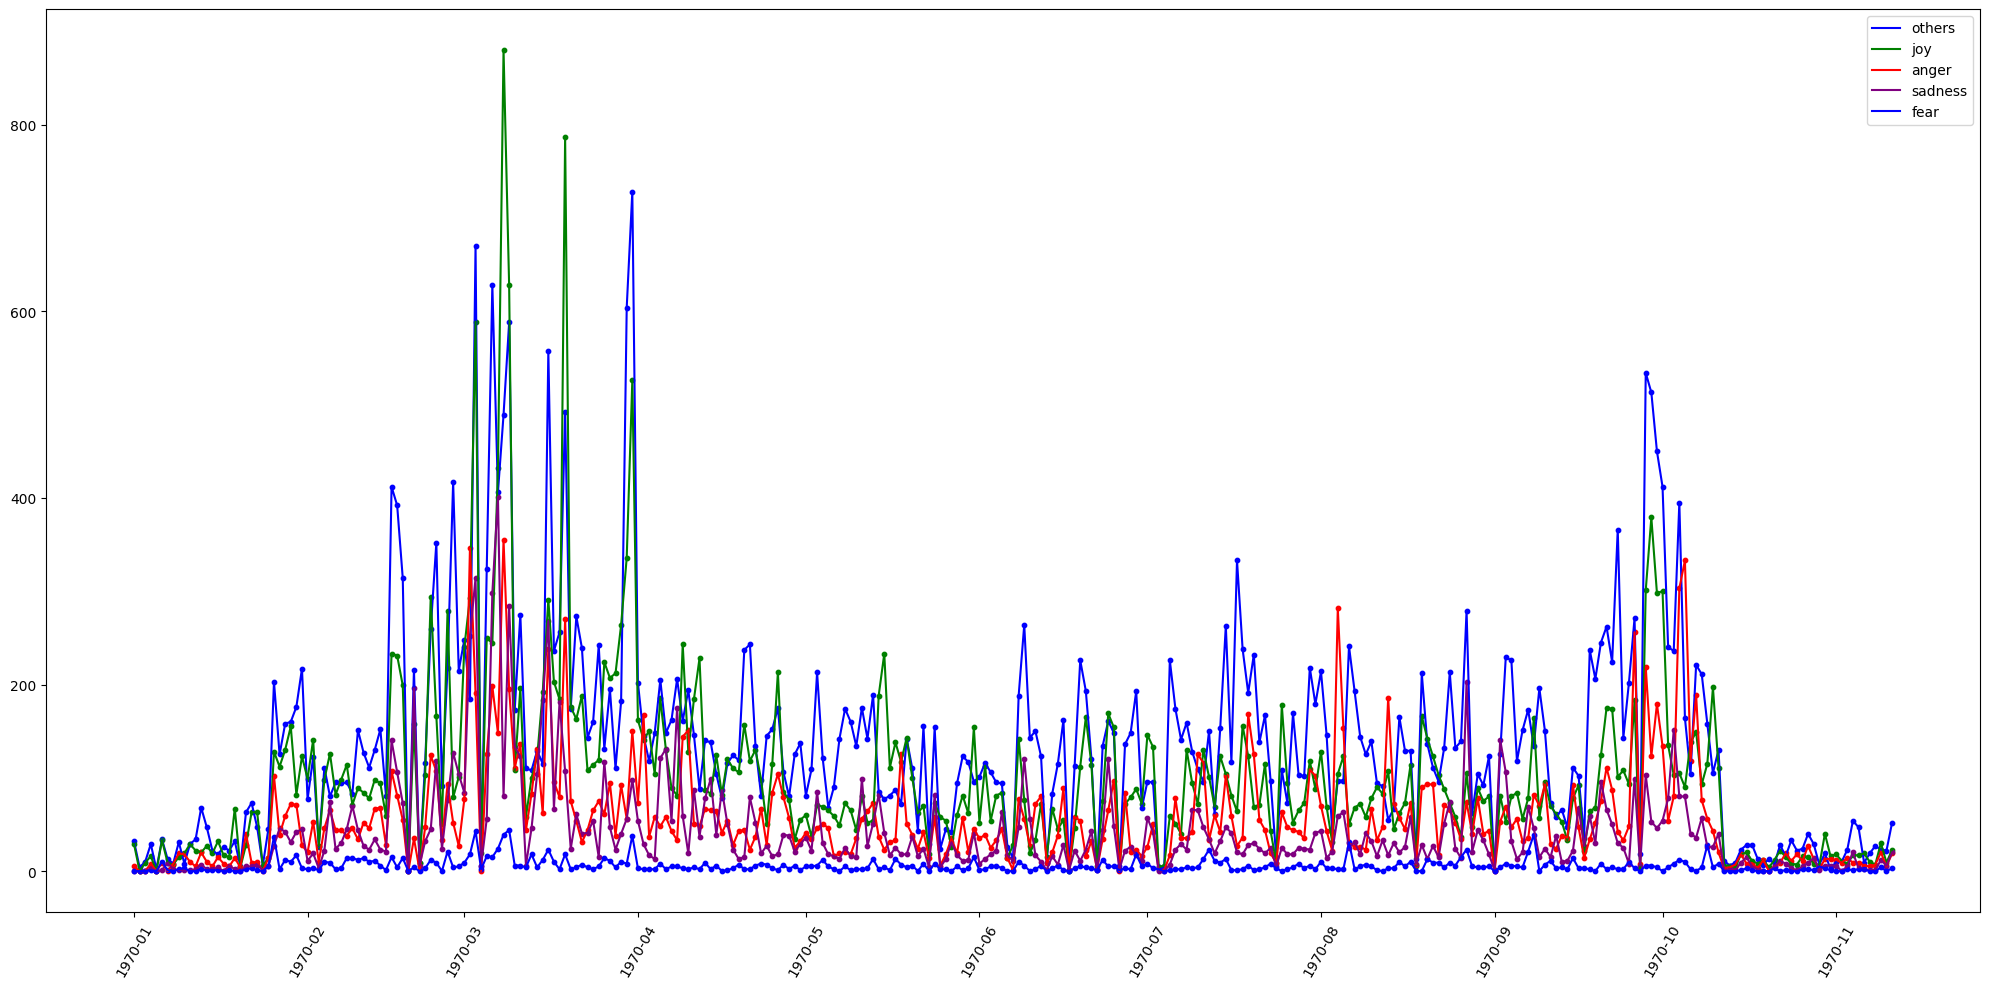

In [257]:
#stacked line plot for emotions
fig, ax = plt.subplots(figsize=(20, 10))
ax.set_prop_cycle(color=['blue', 'green', 'red', 'purple'])
for emotion in df_emotions.columns:
    ax.plot(df_emotions.index.values, df_emotions[emotion].values, label=emotion)
    ax.scatter(df_emotions.index.values, df_emotions[emotion].values, s=10)
xtick_locator = mdates.MonthLocator()
xtick_formatter = mdates.AutoDateFormatter(xtick_locator)
ax.xaxis.set_major_locator(xtick_locator)
ax.xaxis.set_major_formatter(xtick_formatter)
plt.xticks(rotation=60)
ax.legend()
plt.savefig('emotion_line_chart.png')

[False, False, False, False, True, True, True, False, False, False, False, True, True, True, False, False, False, False, True, True, True, False, False, False, False, True, True, True, False, False, False, False, True, True, True, False, False, False, False, True, True, True, False, False, False, False, True, True, True, False, False, False, False, True, True, True, False, False, False, False, True, True, True, False, False, True, True, True, False, False, False, False, True, True, True, False, False, False, False, True, True, True, False, False, False, False, True, True, True, False, False, False, False, True, True, True, False, False, False, False, True, True, True, False, False, False, False, True, True, True, False, False, False, False, True, True, True, False, False, False, False, True, True, True, False, False, False, False, True, True, True, False, False, False, False, True, True, True, False, False, False, False, True, True, True, False, False, True, True, True, False, False, F

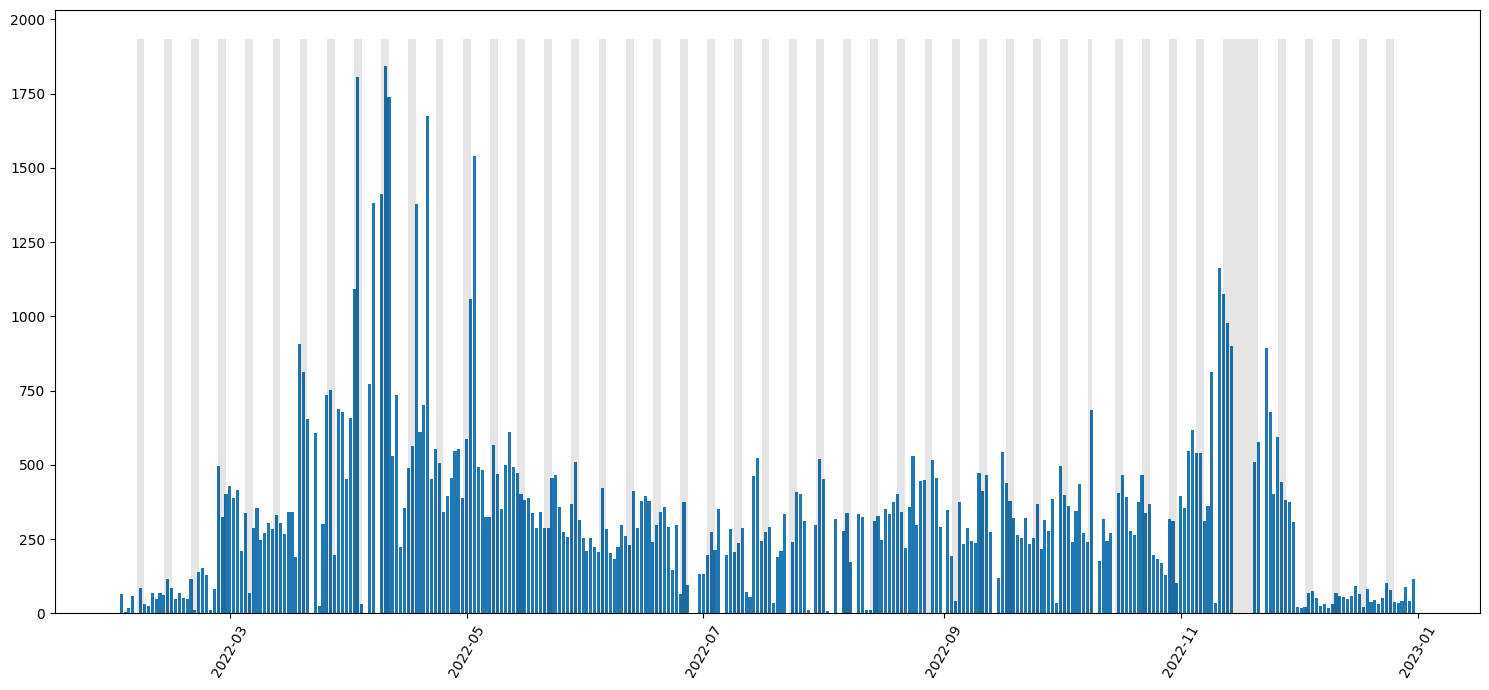

In [258]:
ax = plt.gca()

#deal with datetimes
df['date'] = pd.to_datetime(df['date'])
#weekends 
plt.rcParams["figure.figsize"] = [15, 7]
plt.rcParams["figure.autolayout"] = True
plt.xticks(rotation=60)
date_count = Counter(df.date)
date_counter = date_count
date_count = sorted(date_count)
date_values = [date_counter[i] for i in date_count]
weekends = [(dt.weekday()>=5)|(dt.weekday()==0) for dt in pd.to_datetime(pd.Series(date_count))]
print(weekends)
plt.bar(date_count, date_values)
ax.fill_between(date_count, *ax.get_ylim(), where=weekends, facecolor='k', alpha=.1)
ax.set_ylim(*ax.get_ylim())
plt.savefig('date_hist_weekend.png')
plt.show()

In [259]:
flow_df = pd.read_csv('../hcr_dat_border.csv')
flow_df.head()

,iso3,Country,data_date,Border_Crossings
0,BLR,Belarus,24/Feb/2022,136
1,BLR,Belarus,25/Feb/2022,34
2,BLR,Belarus,26/Feb/2022,172
3,BLR,Belarus,27/Feb/2022,48
4,BLR,Belarus,28/Feb/2022,18


In [260]:
#cleaning...
countries_of_interest = ['Slovakia', 'Hungary', 'Poland', 'Republic of Moldova']
flow_df = flow_df[flow_df.Country.isin(countries_of_interest)]
flow_df['data_date'] = pd.to_datetime(flow_df['data_date'], format='%d/%b/%Y')
flow_df.drop(columns=['iso3'], inplace=True)
flow_df.rename(columns={"data_date": 'date', ' Border_Crossings ' : 'border_crossings'}, inplace=True)
flow_df = flow_df.groupby(['date', 'Country']).sum()
flow_df.head()

border_crossings
date       Country                             
2022-02-24 Hungary                      19,978 
           Poland                       30,096 
           Republic of Moldova          10,928 
           Slovakia                      4,844 
2022-02-25 Hungary                      19,618

In [261]:
flow_df['border_crossings'] = flow_df['border_crossings'].str.replace(',', '')
flow_df['border_crossings'] = flow_df['border_crossings'].str.replace('-', '0')
flow_df['border_crossings'] = flow_df['border_crossings'].str.strip().astype('int')

In [262]:
flow_df.head()

border_crossings
date       Country                              
2022-02-24 Hungary                         19978
           Poland                          30096
           Republic of Moldova             10928
           Slovakia                         4844
2022-02-25 Hungary                         19618

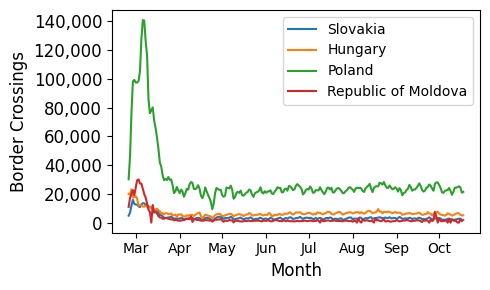

In [263]:
fig, ax = plt.subplots(figsize=(5, 3))
for c in countries_of_interest:
    plt.plot(flow_df.xs(c, level=1), label=c)
ax.legend(fontsize=10)
ax.get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.xlabel('Month', fontsize=12)
xtick_locator = mdates.MonthLocator()
ax.xaxis.set_major_locator(xtick_locator)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.ylabel('Border Crossings', fontsize=12)
plt.yticks(fontsize=12)
plt.xticks(fontsize=10)
plt.savefig('flow_big.png')
plt.show()

In [264]:
df.head()

,date,city,tweet,predicted_emotion
0,2022-10-22,Хмельницький,RT @dw_ukrainian: Хмельницький залишився без с...,others
1,2022-10-22,Хмельницький,RT @dw_ukrainian: Хмельницький залишився без с...,others
2,2022-10-22,Хмельницький,RT @superumka: Луцьк і Хмельницький просять на...,joy
3,2022-10-22,Хмельницький,Хмельницький після вранішніх вибухів опинився ...,sadness
4,2022-10-22,Хмельницький,RT @tsnua: Хмельницький після вранішніх вибухі...,sadness


In [265]:
df_emotions.index.name = 'date'
df_emotions.index = pd.to_datetime(df_emotions.index)
df_emotions[df_emotions.isna().any(axis=1)]

,others,joy,anger,sadness,fear
date,,,,,


In [266]:
df_emotions.drop(columns='others', inplace=True)
df_emotions.head()

,joy,anger,sadness,fear
date,,,,
2022-02-01,29.0,5.0,0.0,0.0
2022-02-02,0.0,0.0,0.0,0.0
2022-02-03,9.0,0.0,0.0,0.0
2022-02-04,16.0,8.0,3.0,1.0
2022-02-05,0.0,0.0,0.0,0.0


In [267]:
flow_combined = flow_df.groupby(['date']).sum()
flow_combined

,border_crossings
date,
2022-02-24,65846
2022-02-25,90155
2022-02-26,131865
2022-02-27,154046
2022-02-28,149041
...,...
2022-10-14,33720
2022-10-15,34394
2022-10-16,34806


In [268]:
merged_df = flow_combined.join(df_emotions.reindex(df_emotions.index, level=0))
merged_df.head()

,border_crossings,joy,anger,sadness,fear
date,,,,,
2022-02-24,65846,6.0,0.0,1.0,0.0
2022-02-25,90155,14.0,14.0,5.0,5.0
2022-02-26,131865,128.0,102.0,27.0,37.0
2022-02-27,154046,112.0,39.0,46.0,2.0
2022-02-28,149041,130.0,59.0,42.0,12.0


In [269]:
merged_df[merged_df.isna().any(axis=1)]
merged_df.dropna(inplace=True)

In [270]:
merged_df.dtypes
merged_df.border_crossings = merged_df.border_crossings.astype('float')
print(merged_df.border_crossings)

date
2022-02-24     65846.0
2022-02-25     90155.0
2022-02-26    131865.0
2022-02-27    154046.0
2022-02-28    149041.0
                ...   
2022-10-14     33720.0
2022-10-15     34394.0
2022-10-16     34806.0
2022-10-17     28507.0
2022-10-18     28249.0
Name: border_crossings, Length: 224, dtype: float64


In [271]:
print(merged_df)

            border_crossings    joy  anger  sadness  fear
date                                                     
2022-02-24           65846.0    6.0    0.0      1.0   0.0
2022-02-25           90155.0   14.0   14.0      5.0   5.0
2022-02-26          131865.0  128.0  102.0     27.0  37.0
2022-02-27          154046.0  112.0   39.0     46.0   2.0
2022-02-28          149041.0  130.0   59.0     42.0  12.0
...                      ...    ...    ...      ...   ...
2022-10-14           33720.0   80.0   43.0     18.0   5.0
2022-10-15           34394.0    1.0    0.0      1.0   0.0
2022-10-16           34806.0   81.0   53.0    141.0   4.0
2022-10-17           28507.0   53.0   69.0    106.0   8.0
2022-10-18           28249.0   80.0   47.0     32.0   6.0

[224 rows x 5 columns]


In [272]:
emotions = merged_df.columns[1:]
for j,r in enumerate(emotions):
   print(r)
   corr = merged_df[r].corr(merged_df.border_crossings)
   print(round(corr, 3))

joy
-0.058
anger
-0.08
sadness
-0.095
fear
0.086


-0.32161757476790037


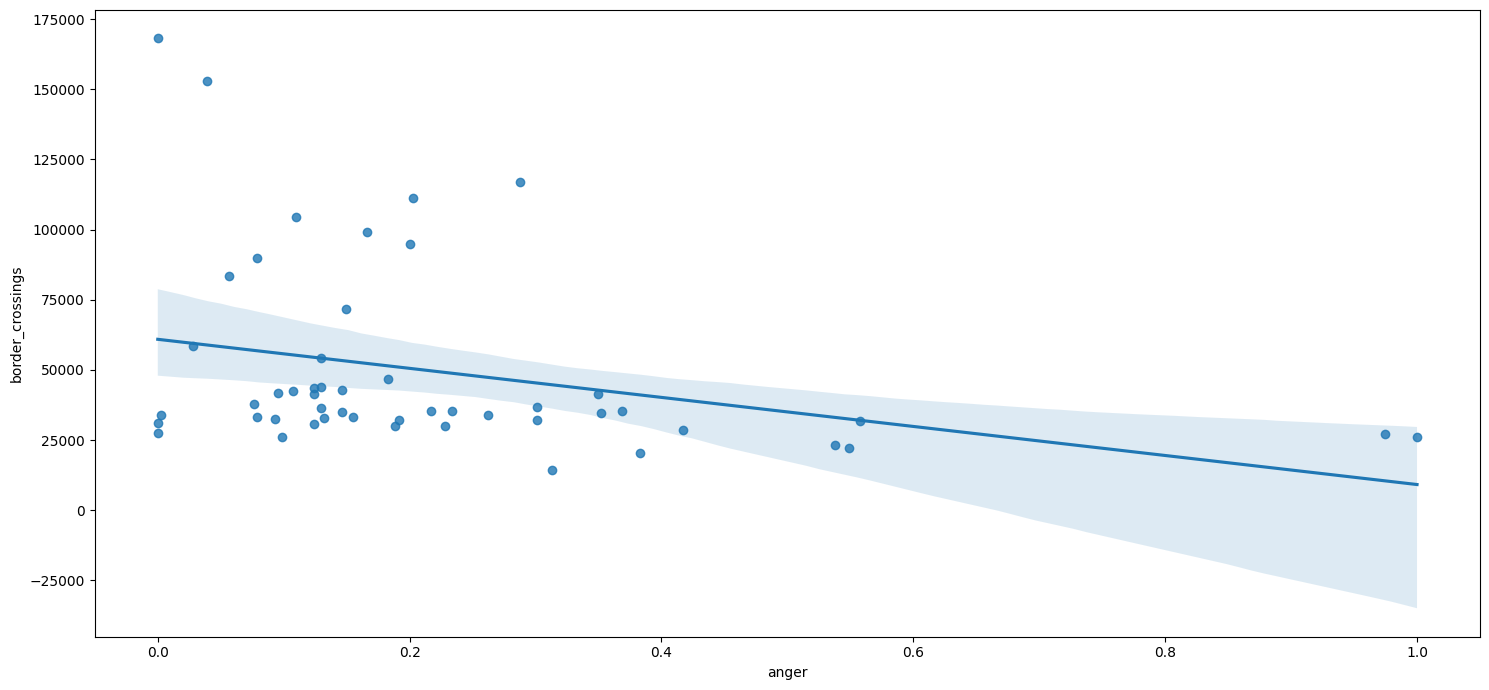

In [273]:
anger_normalized = (merged_df.anger - np.min(merged_df.anger))/ (np.max(merged_df.anger) - np.min(merged_df.anger))
sns.regplot(x=anger_normalized[:-12][:50], y=merged_df.border_crossings[12:][:50])
print(np.corrcoef(anger_normalized[:-12][:50], merged_df.border_crossings[12:][:50])[0][1])

In [274]:
merged_df[merged_df.isna().any(axis=1)]

,border_crossings,joy,anger,sadness,fear
date,,,,,


In [275]:
offset_range = np.arange(-20, 20)
corr_dict = {'joy':[], 'anger':[], 'fear': [], 'sadness': []}
for i in offset_range:
    for e in emotions:
        if i < 0:
            corr = merged_df[e][-i:].corr(merged_df['border_crossings'][:i])
        elif i > 0:
            corr = merged_df[e][:-i].corr(merged_df['border_crossings'][i:])
        else:
            corr = merged_df[e].corr(merged_df['border_crossings'])
        corr_dict[e].append(corr**2)

In [276]:
offset_range = np.arange(-20, 20)
corr_dict = {'joy':[], 'anger':[], 'fear': [], 'sadness': []}
for i in offset_range:
    for e in emotions:
            shift = merged_df[e].shift(i)
            print(shift)
            corr = shift.corr(merged_df['border_crossings'])
            corr_dict[e].append(corr**2)

date
2022-02-24     98.0
2022-02-25     94.0
2022-02-26     59.0
2022-02-27    233.0
2022-02-28    231.0
              ...  
2022-10-14      NaN
2022-10-15      NaN
2022-10-16      NaN
2022-10-17      NaN
2022-10-18      NaN
Name: joy, Length: 224, dtype: float64
date
2022-02-24     67.0
2022-02-25     68.0
2022-02-26     28.0
2022-02-27    107.0
2022-02-28     81.0
              ...  
2022-10-14      NaN
2022-10-15      NaN
2022-10-16      NaN
2022-10-17      NaN
2022-10-18      NaN
Name: anger, Length: 224, dtype: float64
date
2022-02-24     34.0
2022-02-25     23.0
2022-02-26     21.0
2022-02-27    140.0
2022-02-28    106.0
              ...  
2022-10-14      NaN
2022-10-15      NaN
2022-10-16      NaN
2022-10-17      NaN
2022-10-18      NaN
Name: sadness, Length: 224, dtype: float64
date
2022-02-24    11.0
2022-02-25     6.0
2022-02-26     1.0
2022-02-27    15.0
2022-02-28     4.0
              ... 
2022-10-14     NaN
2022-10-15     NaN
2022-10-16     NaN
2022-10-17     NaN
2022-10

In [277]:
corr_dict

{'joy': [0.027149715164624805,
  0.01613183761873271,
  0.01040764523941566,
  0.006587535693791538,
  0.0030922040901804272,
  0.0015651428546828508,
  0.002087414878928862,
  0.0008917063526762672,
  0.00024241940125711067,
  0.00010592837342317572,
  0.0005910657860494146,
  0.0018936635517129256,
  0.0022863860467960974,
  0.002258579944191028,
  0.002965219132099199,
  0.004168888943576241,
  0.003528505706115107,
  0.002320957076705155,
  0.0016854548632367337,
  0.001978460340664692,
  0.003349591994698961,
  0.005593309439514996,
  0.005841396999651942,
  0.006439389739952311,
  0.004002336246299829,
  0.00381271015985612,
  0.006039659029235101,
  0.008019237547664327,
  0.007563275043251932,
  0.006307067384607689,
  0.009621153090462343,
  0.01577454198210079,
  0.020285272816391444,
  0.02724939985908219,
  0.03524320010919817,
  0.027489670070933843,
  0.017892458133941205,
  0.014371969651467024,
  0.023115722023376833,
  0.030430200323498746],
 'anger': [0.01420466736268

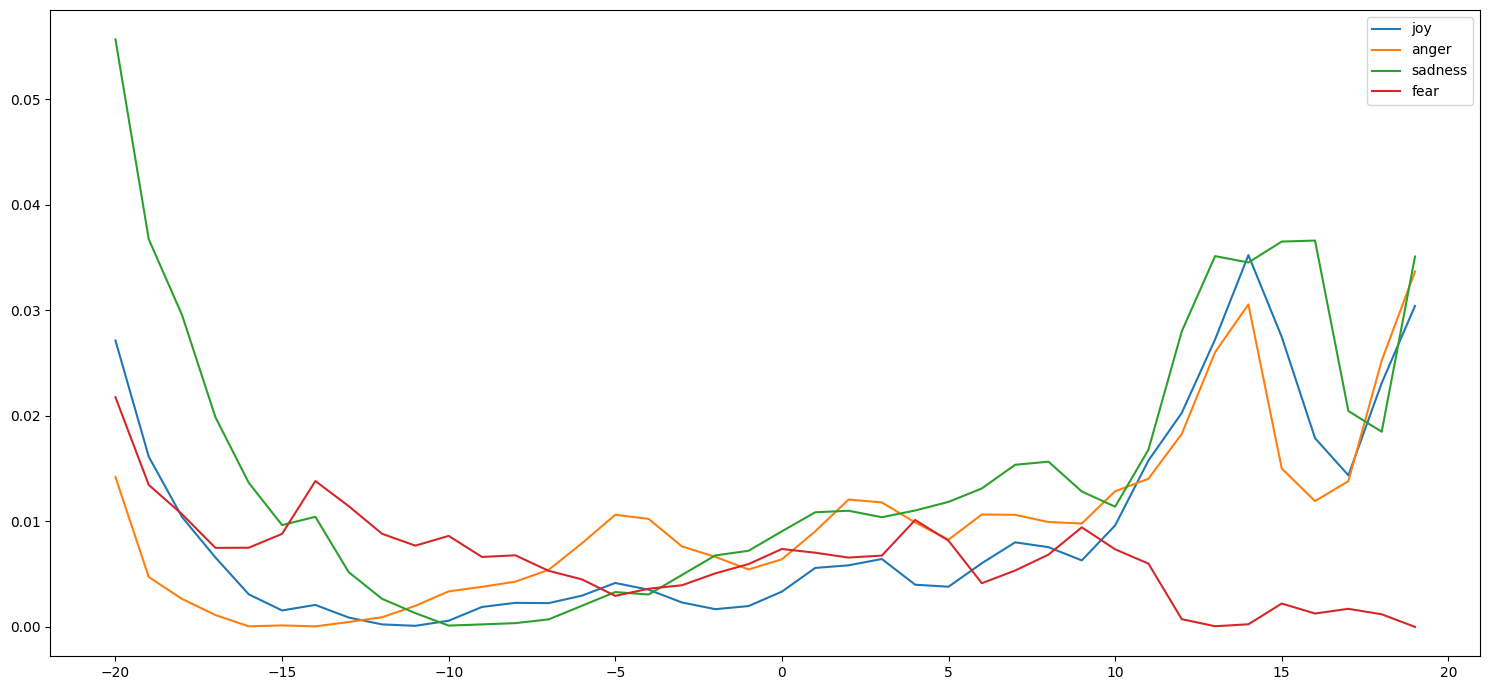

In [278]:
fig = plt.figure()
for i in emotions:
    plt.plot(offset_range, corr_dict[i], label=i)
plt.legend()
plt.show()


In [279]:
merged_df[merged_df.isna().any(axis=1)]

,border_crossings,joy,anger,sadness,fear
date,,,,,


In [280]:
merged_df.head()

,border_crossings,joy,anger,sadness,fear
date,,,,,
2022-02-24,65846.0,6.0,0.0,1.0,0.0
2022-02-25,90155.0,14.0,14.0,5.0,5.0
2022-02-26,131865.0,128.0,102.0,27.0,37.0
2022-02-27,154046.0,112.0,39.0,46.0,2.0
2022-02-28,149041.0,130.0,59.0,42.0,12.0


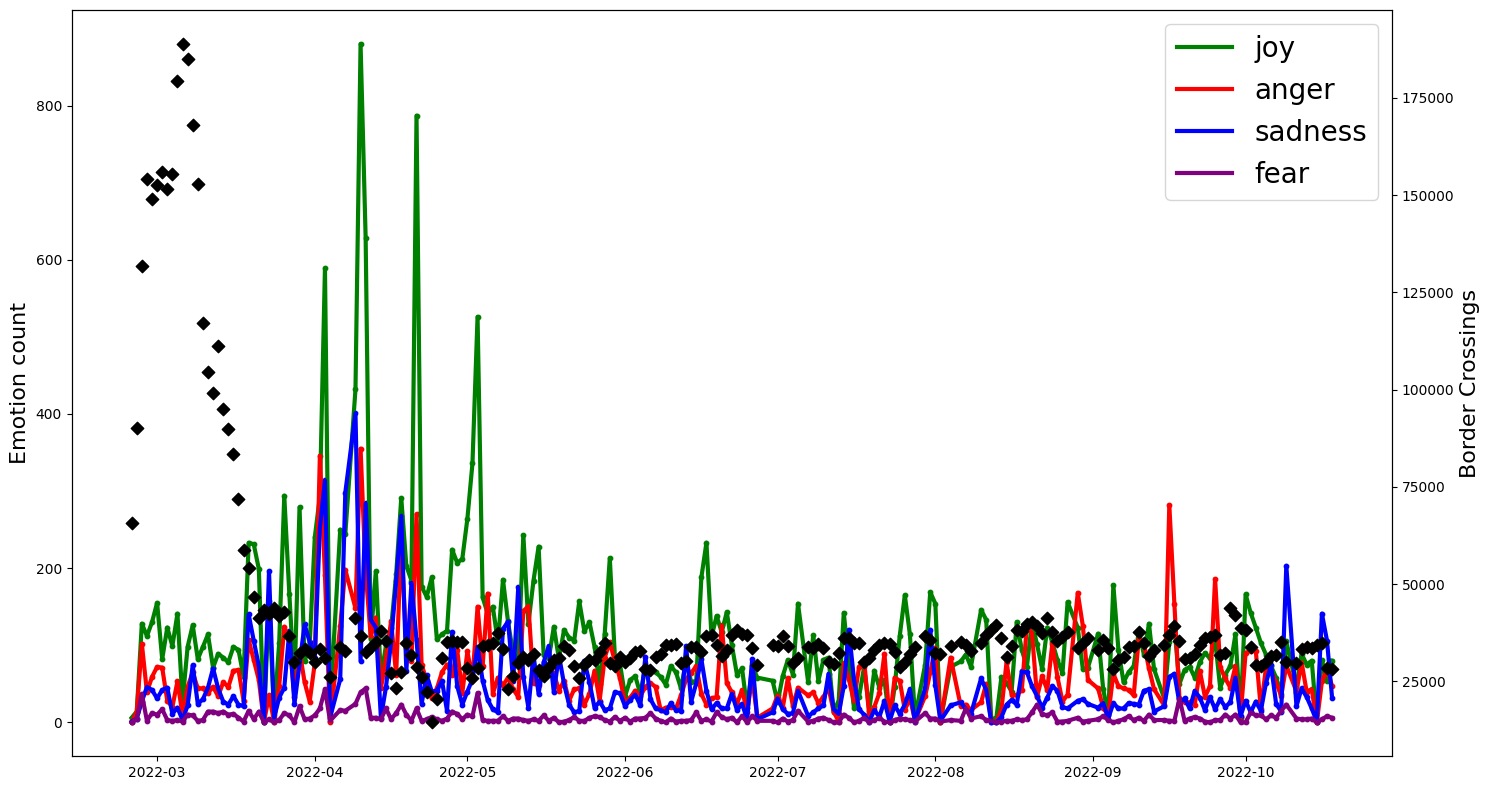

In [281]:
#stacked line plot for emotions
fig, ax = plt.subplots(figsize=(15, 8))
ax.set_prop_cycle(color=['green', 'red', 'blue', 'purple'])
for emotion in merged_df.columns[1:]:
    ax.plot(merged_df.index.values,merged_df[emotion].values, label=emotion, linewidth=3)
    ax.scatter(merged_df.index.values, merged_df[emotion].values, s=10)
ax.legend(fontsize=20)
#create second yaxis
ax2 = ax.twinx()
ax2.scatter(merged_df.index.values, merged_df.border_crossings.values, color='black', marker='D', s=40)
xtick_locator = mdates.MonthLocator()
xtick_formatter = mdates.AutoDateFormatter(xtick_locator)
#fix axes scale and labeling
ax.xaxis.set_major_locator(xtick_locator)
ax.xaxis.set_major_formatter(xtick_formatter)
ax.tick_params(axis='both', which='minor', labelsize=16)
ax2.tick_params(axis='both', which='minor', labelsize=16)
ax.set_ylabel('Emotion count', fontsize=16)
ax2.set_ylabel('Border Crossings', fontsize=16)
plt.xticks(rotation=60)
plt.xlabel('Date')
plt.savefig('trends_w_flow.png')


In [282]:
normalized_df= pd.DataFrame(columns=merged_df.columns)
for v in merged_df.columns[1:]:
    normalized_df[v] = (merged_df[v] - np.min(merged_df[v])) /  (np.max(merged_df[v]) - np.min(merged_df[v]))
normalized_df['border_crossings'] = merged_df['border_crossings']
normalized_df.head()


,border_crossings,joy,anger,sadness,fear
date,,,,,
2022-02-24,65846.0,0.006818,0.000000,0.002494,0.000000
2022-02-25,90155.0,0.015909,0.039437,0.012469,0.113636
2022-02-26,131865.0,0.145455,0.287324,0.067332,0.840909
2022-02-27,154046.0,0.127273,0.109859,0.114713,0.045455
2022-02-28,149041.0,0.147727,0.166197,0.104738,0.272727


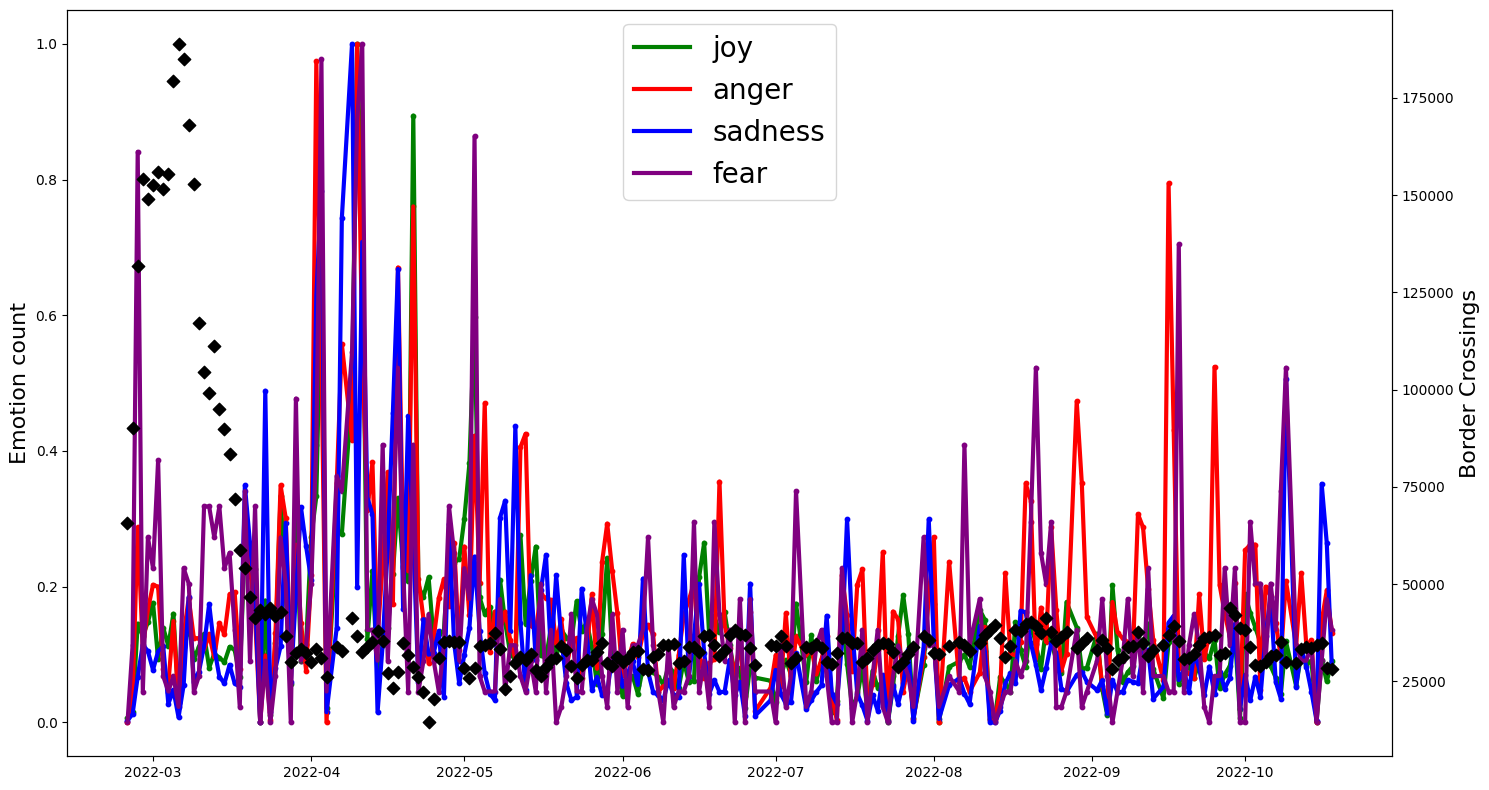

In [283]:
#stacked line plot for emotions
fig, ax = plt.subplots(figsize=(15, 8))
ax.set_prop_cycle(color=['green', 'red', 'blue', 'purple'])
for emotion in normalized_df.columns[1:]:
    ax.plot(normalized_df.index.values,normalized_df[emotion].values, label=emotion, linewidth=3)
    ax.scatter(normalized_df.index.values, normalized_df[emotion].values, s=10)
ax.legend(fontsize=20)
#create second yaxis
ax2 = ax.twinx()
ax2.scatter(normalized_df.index.values, normalized_df.border_crossings.values, color='black', marker='D', s=40)
xtick_locator = mdates.MonthLocator()
xtick_formatter = mdates.AutoDateFormatter(xtick_locator)
#fix axes scale and labeling
ax.xaxis.set_major_locator(xtick_locator)
ax.xaxis.set_major_formatter(xtick_formatter)
ax.tick_params(axis='both', which='minor', labelsize=16)
ax2.tick_params(axis='both', which='minor', labelsize=16)
ax.set_ylabel('Emotion count', fontsize=16)
ax2.set_ylabel('Border Crossings', fontsize=16)
plt.xticks(rotation=60)
plt.xlabel('Date')
plt.savefig('normalized_emotion.png')


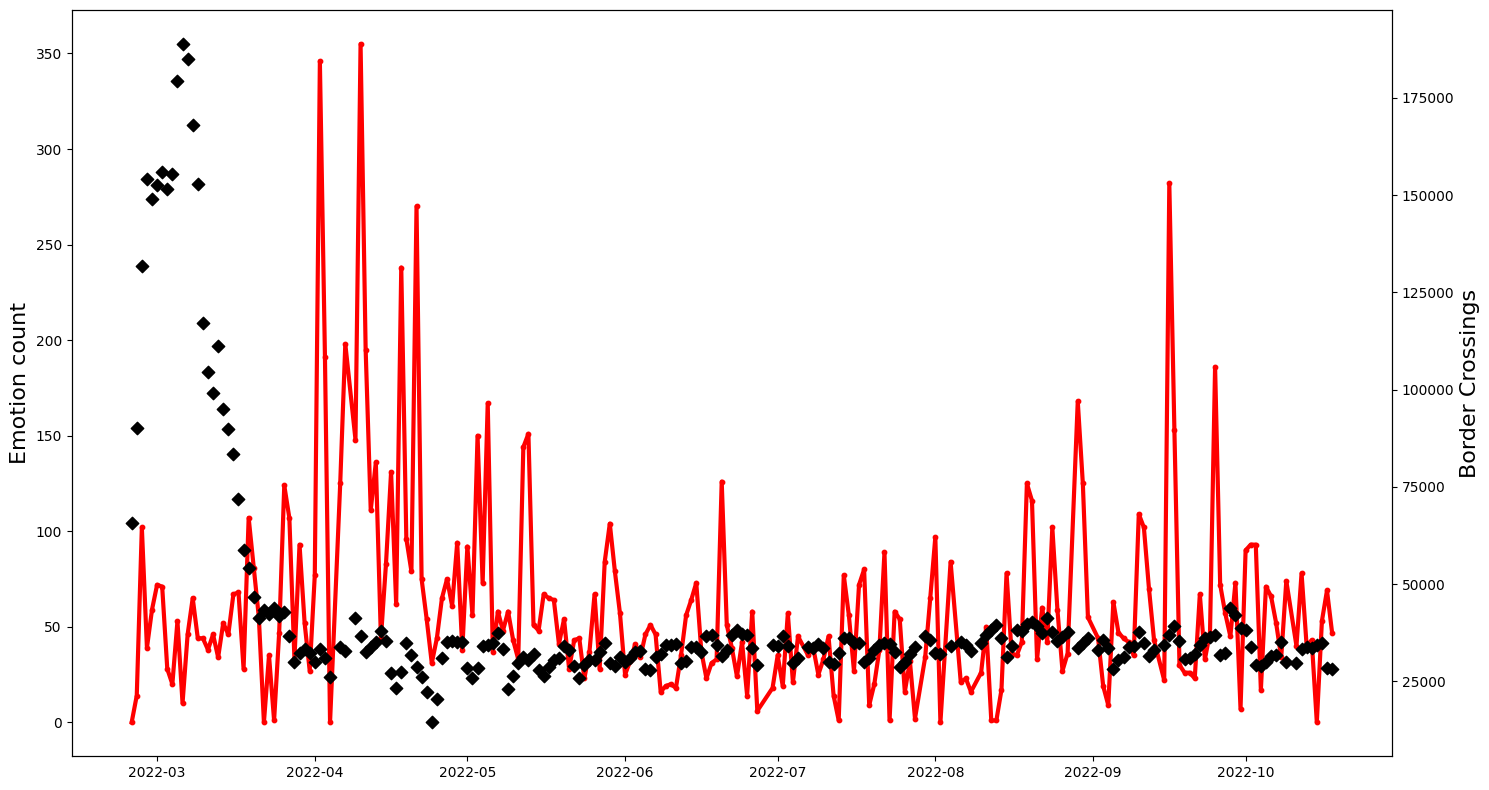

In [284]:
fig, ax = plt.subplots(figsize=(15, 8))
emotion = 'anger'
ax.plot(merged_df.index.values,merged_df[emotion].values, label=emotion, linewidth=3, color='red')
ax.scatter(merged_df.index.values, merged_df[emotion].values, s=10, color='red')
#create second yaxis
ax2 = ax.twinx()
ax2.scatter(merged_df.index.values, merged_df.border_crossings.values, color='black', marker='D', s=40)
xtick_locator = mdates.MonthLocator()
xtick_formatter = mdates.AutoDateFormatter(xtick_locator)
#fix axes scale and labeling
ax.xaxis.set_major_locator(xtick_locator)
ax.xaxis.set_major_formatter(xtick_formatter)
ax.tick_params(axis='both', which='minor', labelsize=16)
ax2.tick_params(axis='both', which='minor', labelsize=16)
ax.set_ylabel('Emotion count', fontsize=16)
ax2.set_ylabel('Border Crossings', fontsize=16)
plt.xticks(rotation=60)
plt.xlabel('Date')
plt.savefig('anger_flow.png')

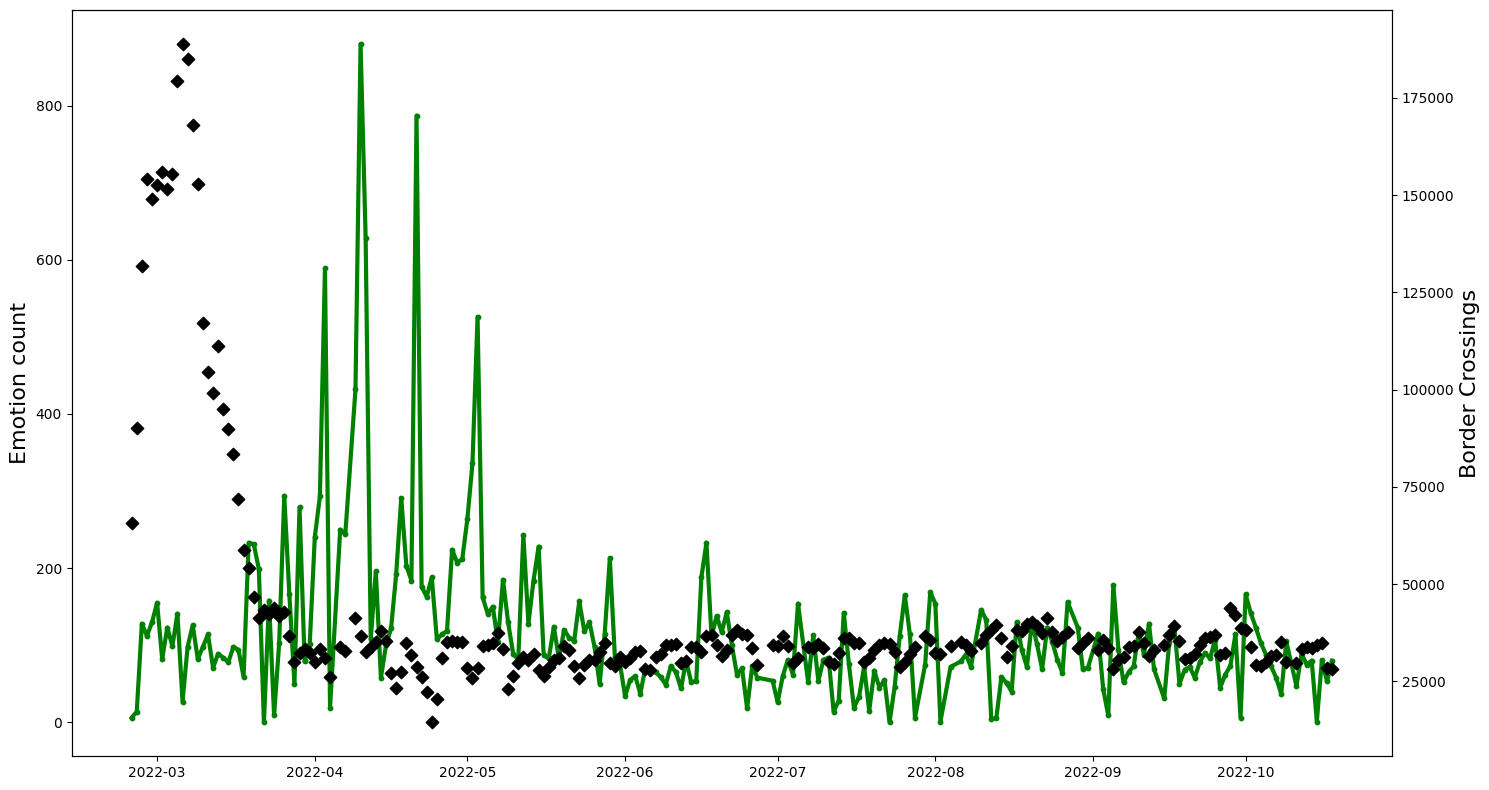

In [285]:
fig, ax = plt.subplots(figsize=(15, 8))
emotion = 'joy'
ax.plot(merged_df.index.values,merged_df[emotion].values, label=emotion, linewidth=3, color='green')
ax.scatter(merged_df.index.values, merged_df[emotion].values, s=10, color='green')
#create second yaxis
ax2 = ax.twinx()
ax2.scatter(merged_df.index.values, merged_df.border_crossings.values, color='black', marker='D', s=40)
xtick_locator = mdates.MonthLocator()
xtick_formatter = mdates.AutoDateFormatter(xtick_locator)
#fix axes scale and labeling
ax.xaxis.set_major_locator(xtick_locator)
ax.xaxis.set_major_formatter(xtick_formatter)
ax.tick_params(axis='both', which='minor', labelsize=16)
ax2.tick_params(axis='both', which='minor', labelsize=16)
ax.set_ylabel('Emotion count', fontsize=16)
ax2.set_ylabel('Border Crossings', fontsize=16)
plt.xticks(rotation=60)
plt.xlabel('Date')
plt.savefig('joy_flow.png')

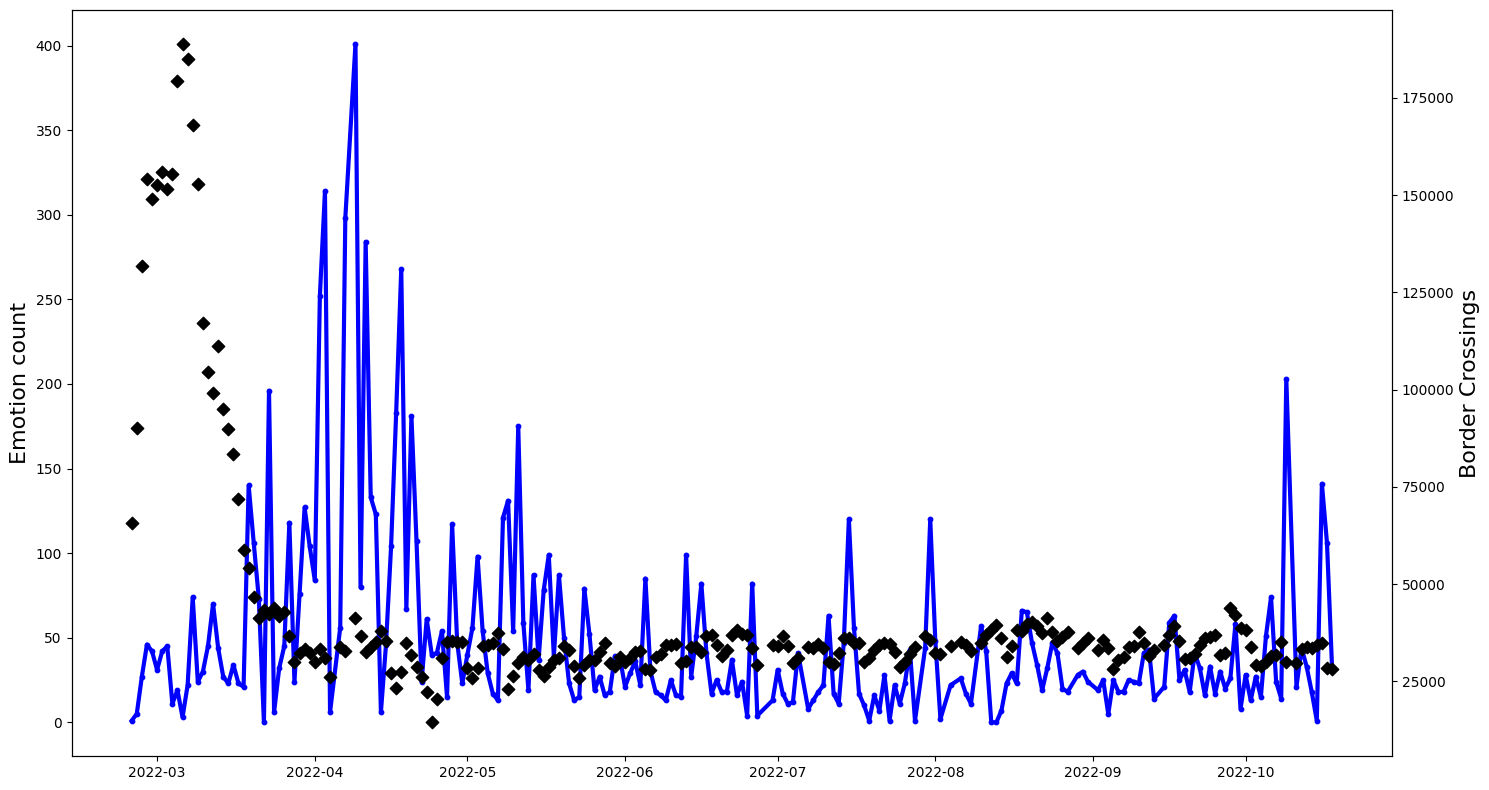

In [286]:
fig, ax = plt.subplots(figsize=(15, 8))
emotion = 'sadness'
ax.plot(merged_df.index.values,merged_df[emotion].values, label=emotion, linewidth=3, color='blue')
ax.scatter(merged_df.index.values, merged_df[emotion].values, s=10, color='blue')
#create second yaxis
ax2 = ax.twinx()
ax2.scatter(merged_df.index.values, merged_df.border_crossings.values, color='black', marker='D', s=40)
xtick_locator = mdates.MonthLocator()
xtick_formatter = mdates.AutoDateFormatter(xtick_locator)
#fix axes scale and labeling
ax.xaxis.set_major_locator(xtick_locator)
ax.xaxis.set_major_formatter(xtick_formatter)
ax.tick_params(axis='both', which='minor', labelsize=16)
ax2.tick_params(axis='both', which='minor', labelsize=16)
ax.set_ylabel('Emotion count', fontsize=16)
ax2.set_ylabel('Border Crossings', fontsize=16)
plt.xticks(rotation=60)
plt.xlabel('Date')
plt.savefig('sadness_flow.png')

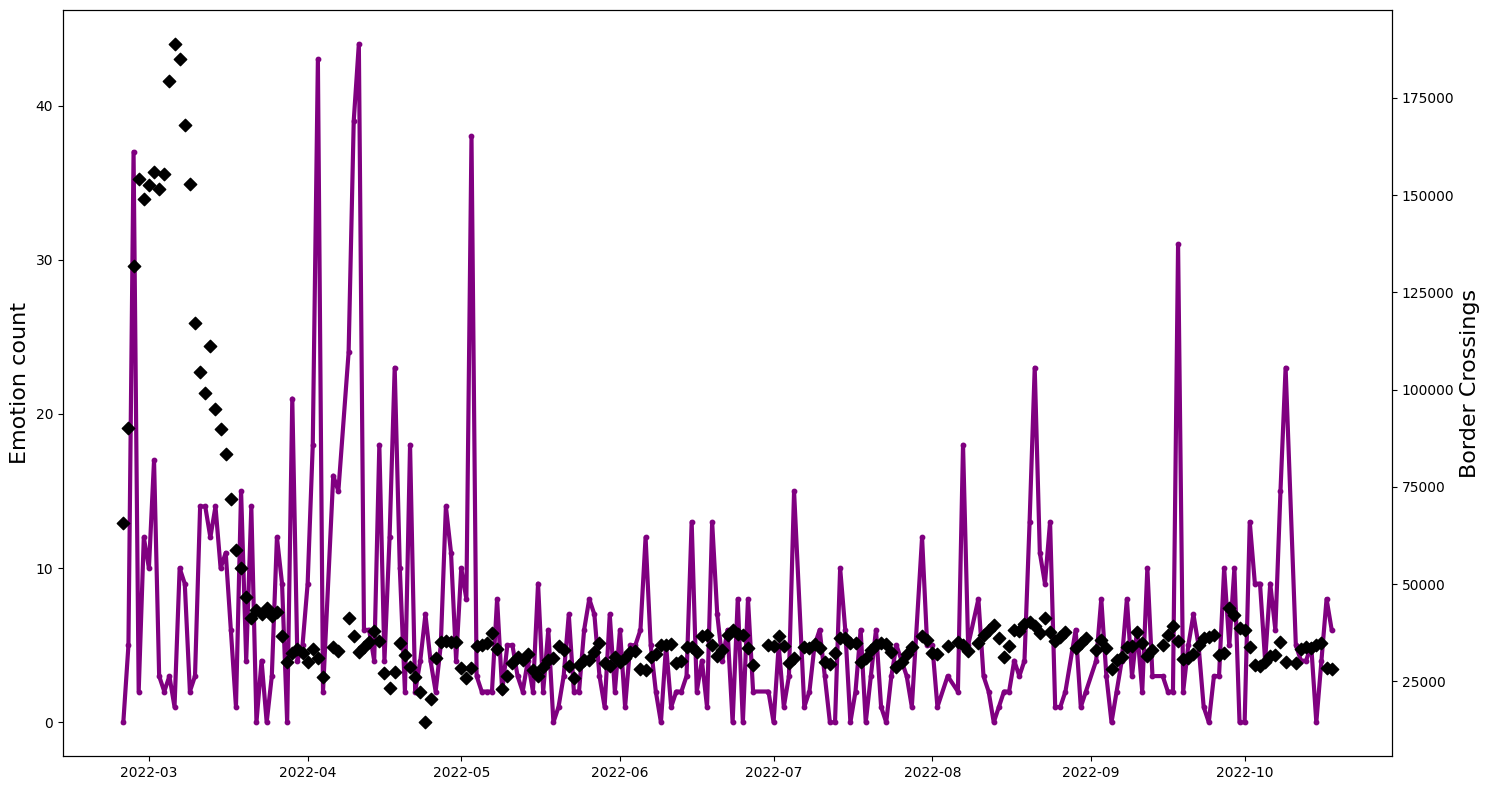

In [287]:
fig, ax = plt.subplots(figsize=(15, 8))
emotion = 'fear'
ax.plot(merged_df.index.values,merged_df[emotion].values, label=emotion, linewidth=3, color='purple')
ax.scatter(merged_df.index.values, merged_df[emotion].values, s=10, color='purple')
#create second yaxis
ax2 = ax.twinx()
ax2.scatter(merged_df.index.values, merged_df.border_crossings.values, color='black', marker='D', s=40)
xtick_locator = mdates.MonthLocator()
xtick_formatter = mdates.AutoDateFormatter(xtick_locator)
#fix axes scale and labeling
ax.xaxis.set_major_locator(xtick_locator)
ax.xaxis.set_major_formatter(xtick_formatter)
ax.tick_params(axis='both', which='minor', labelsize=16)
ax2.tick_params(axis='both', which='minor', labelsize=16)
ax.set_ylabel('Emotion count', fontsize=16)
ax2.set_ylabel('Border Crossings', fontsize=16)
plt.xticks(rotation=60)
plt.xlabel('Date')
plt.savefig('fear_flow.png')

In [288]:
for c in merged_df.columns[1:]:
    print(c)
    print(merged_df.nlargest(10, [c]))

joy
            border_crossings    joy  anger  sadness  fear
date                                                     
2022-04-10           36660.0  880.0  355.0     80.0  39.0
2022-04-21           28757.0  787.0  270.0    107.0  18.0
2022-04-11           32510.0  628.0  195.0    284.0  44.0
2022-04-03           31061.0  589.0  191.0    314.0  43.0
2022-05-03           28439.0  526.0  150.0     98.0  38.0
2022-04-09           41291.0  432.0  148.0    401.0  24.0
2022-05-02           25803.0  336.0   56.0     56.0   8.0
2022-03-26           42820.0  294.0  124.0     45.0  12.0
2022-04-02           33251.0  293.0  346.0    252.0  18.0
2022-04-18           27384.0  291.0  238.0    268.0  23.0
anger
            border_crossings    joy  anger  sadness  fear
date                                                     
2022-04-10           36660.0  880.0  355.0     80.0  39.0
2022-04-02           33251.0  293.0  346.0    252.0  18.0
2022-09-16           36946.0  104.0  282.0     59.0   2.0
2022